# What it takes to be Data Scientist?
***

<img src='https://c2.staticflickr.com/8/7187/6964774217_53d449288a_b.jpg'>

## Table of Contents
***
* [1. Importing dataset and data preprocessing](#importing_dataset_and_data_preprocessing) <br>
   * [1.1. Importing essential libraries](#importing_essential_libraries) <br>
   * [1.2. Importing Datasets](#importing_datasets) <br>
   * [1.3. Data preprocessing](#data_preprocessing) <br>
* [1. Importing dataset and data preprocessing](#importing_dataset_and_data_preprocessing) <br>   

## 1. Importing dataset and data preprocessing
<a id="importing_dataset_and_data_preprocessing"></a>

### 1.1. Importing essential libraries
<a id="importing_essential_libraries"></a>

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from scipy.optimize import curve_fit
import seaborn as sns

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
%matplotlib inline

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from mpl_toolkits.basemap import Basemap

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

### 1.2. Importing Datasets
<a id="importing_datasets"></a>

In [2]:
# File containing freeform answers to Kaggle's survey questions
multiple_choice = pd.read_csv("../00_Datasets/Kaggle_Survey/multipleChoiceResponses.csv", encoding="ISO-8859-1", low_memory=False)
# File containing countries shapes which will allow you to advanced map plotting
map_path = "../00_Datasets/Kaggle_Survey/ne_10m_admin_0_countries"

### 1.3. Data preprocessing 
<a id="data_preprocessing "></a>

<b>NOTE:</b> Due to the inconsistencies between the data set and the file needed to create the world map, we have to correct the names of some countries. To do this we will use the auxiliary function.

In [ ]:
country_dict = {"United States": "United States of America",
                "Republic of China": "China"}

for country in list(country_dict.keys()):
    multiple_choice.loc[multiple_choice[multiple_choice["Country"] == country].index, "Country" ] = country_dict[country]

In [4]:
nationality = multiple_choice['Country'].value_counts()
nationality_count = nationality.divide(nationality.max()).to_dict()

## 2. Data visualization 
<a id="data_visualization"></a>

### 2.1. Data Science Powerhouses
<a id="data_science_powerhouses"></a>

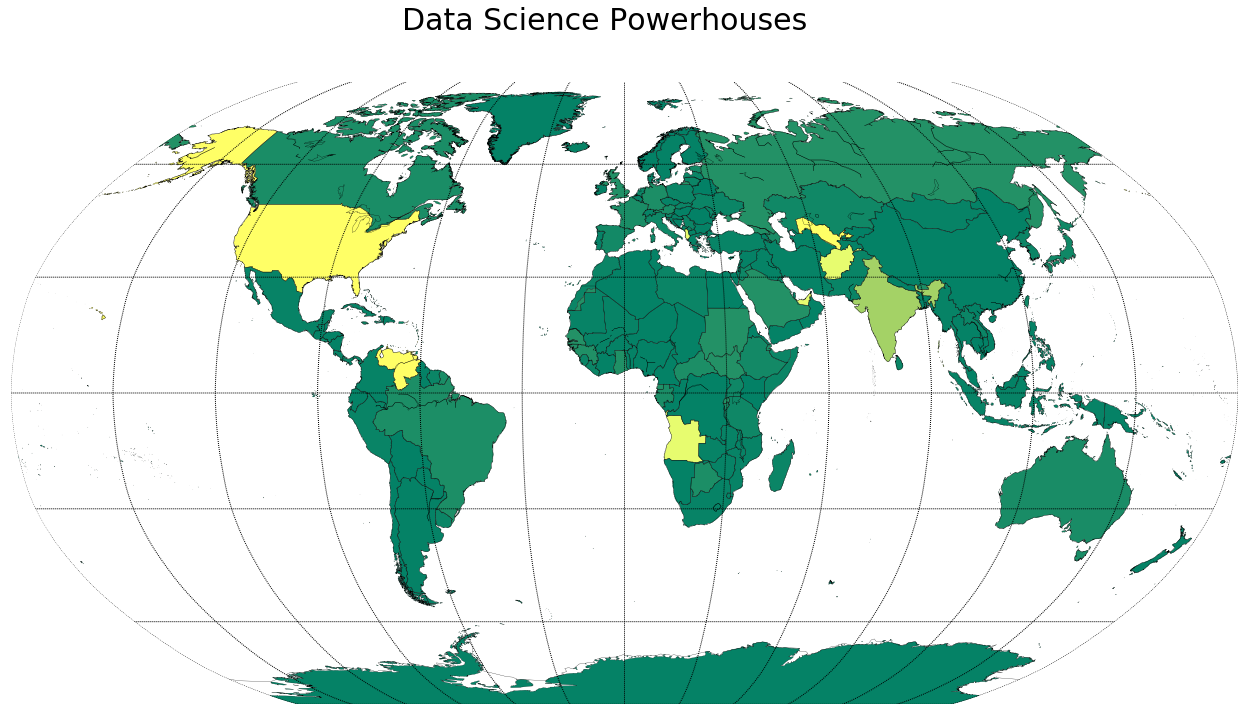

In [42]:
cmap = mpl.cm.get_cmap('summer')
fig = plt.figure(figsize=(22, 12))
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.suptitle("Data Science Powerhouses", fontsize=30, y=.95)

m = Basemap(projection='robin',lon_0=0,resolution='c')

m.drawmapboundary(color='w')
m.drawcoastlines(linewidth=0.25)
m.drawcountries(linewidth=0.25)
m.drawmeridians(np.arange(0,360,30))
m.drawparallels(np.arange(-90,90,30))

m.readshapefile(map_path, 'units', linewidth=.2)
for info, shape in zip(m.units_info, m.units):
    iso3 = info['ADMIN']
    if iso3 in nationality_count:
        color = cmap(nationality_count[iso3])

    patches = [Polygon(np.array(shape), True)]
    pc = PatchCollection(patches)
    pc.set_facecolor(color)
    ax.add_collection(pc)

In [43]:
nationality

United States of America       4197
India                          2704
Other                          1023
Russia                          578
United Kingdom                  535
People 's Republic of China     471
Brazil                          465
Germany                         460
France                          442
Canada                          440
Australia                       421
Spain                           320
Japan                           277
Taiwan                          254
Italy                           238
Netherlands                     205
Ukraine                         196
South Korea                     194
Singapore                       184
Poland                          184
Pakistan                        161
Turkey                          144
Indonesia                       131
Switzerland                     129
South Africa                    127
Mexico                          126
Colombia                        113
Iran                        